In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import TomekLinks
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.svm import SVC



In [3]:
parkinsons_dataset=pd.read_csv("../datasets/parkinsons.csv")

In [4]:
parkinsons_dataset.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [5]:
parkinsons_dataset.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [6]:
parkinsons_dataset['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [7]:
X=parkinsons_dataset.drop(columns=['status'],axis=1)
Y=parkinsons_dataset['status']

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.under_sampling import TomekLinks  # Handle imbalance

# Load the Parkinson's dataset
parkinsons_dataset = pd.read_csv('../datasets/parkinsons.csv')

# Splitting features and target
X = parkinsons_dataset.drop(columns=['status','name'])  # Features
Y = parkinsons_dataset['status']  # Target variable (0 or 1)

# 1. Handle Class Imbalance using Tomek Links (Removes Majority Samples Close to Minority)
tomek = TomekLinks()
X_resampled, Y_resampled = tomek.fit_resample(X, Y)

# 2. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# 3. Stratified Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_resampled, test_size=0.2, random_state=42, stratify=Y_resampled)

# 4. Hyperparameter Tuning with GridSearchCV (Stratified K-Fold Cross-Validation)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4.1 SVM with GridSearchCV
svm_model = SVC()
svm_param_grid = {'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']}
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=skf, scoring='accuracy')
svm_grid_search.fit(X_train, Y_train)
svm_best_model = svm_grid_search.best_estimator_
svm_y_pred = svm_best_model.predict(X_test)

# 4.2 Random Forest with GridSearchCV
rf_model = RandomForestClassifier(random_state=42)
rf_param_grid = {'n_estimators': [50, 100], 'max_depth': [5, 10, 15]}
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=skf, scoring='accuracy')
rf_grid_search.fit(X_train, Y_train)
rf_best_model = rf_grid_search.best_estimator_
rf_y_pred = rf_best_model.predict(X_test)

# 4.3 XGBoost with GridSearchCV (Regularized)
xgb_model = XGBClassifier(random_state=42)
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'reg_alpha': [0, 0.1, 0.5],  # L1 regularization
    'reg_lambda': [0.5, 1, 2]    # L2 regularization
}
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=skf, scoring='accuracy')
xgb_grid_search.fit(X_train, Y_train)
xgb_best_model = xgb_grid_search.best_estimator_
xgb_y_pred = xgb_best_model.predict(X_test)

# 5. Evaluate Models
print("SVM Best Model Accuracy:", accuracy_score(Y_test, svm_y_pred))
print("Random Forest Best Model Accuracy:", accuracy_score(Y_test, rf_y_pred))
print("XGBoost Best Model Accuracy:", accuracy_score(Y_test, xgb_y_pred))

# 6. Detailed Classification Report
print("\nSVM Classification Report:\n", classification_report(Y_test, svm_y_pred))
print("\nRandom Forest Classification Report:\n", classification_report(Y_test, rf_y_pred))
print("\nXGBoost Classification Report:\n", classification_report(Y_test, xgb_y_pred))

print("Training Accuracy (SVM):", accuracy_score(Y_train, svm_best_model.predict(X_train)))
print("Training Accuracy (RF):", accuracy_score(Y_train, rf_best_model.predict(X_train)))
print("Training Accuracy (XGBoost):", accuracy_score(Y_train, xgb_best_model.predict(X_train)))



SVM Best Model Accuracy: 0.9210526315789473
Random Forest Best Model Accuracy: 0.9210526315789473
XGBoost Best Model Accuracy: 0.9210526315789473

SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.90      1.00      0.95        28

    accuracy                           0.92        38
   macro avg       0.95      0.85      0.89        38
weighted avg       0.93      0.92      0.92        38


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.96      0.93      0.95        28

    accuracy                           0.92        38
   macro avg       0.89      0.91      0.90        38
weighted avg       0.92      0.92      0.92        38


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86 

SVM Best Model Accuracy: 0.9210526315789473
Random Forest Best Model Accuracy: 0.9210526315789473
XGBoost Best Model Accuracy: 0.8947368421052632

Training Accuracy (SVM): 0.8874172185430463
Training Accuracy (RF): 0.9536423841059603
Training Accuracy (XGBoost): 0.8609271523178808


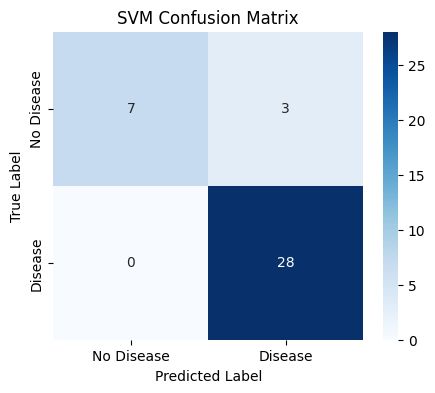

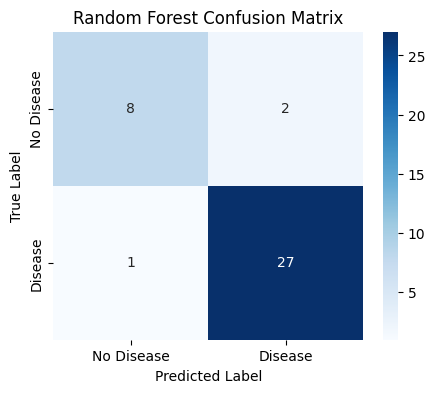

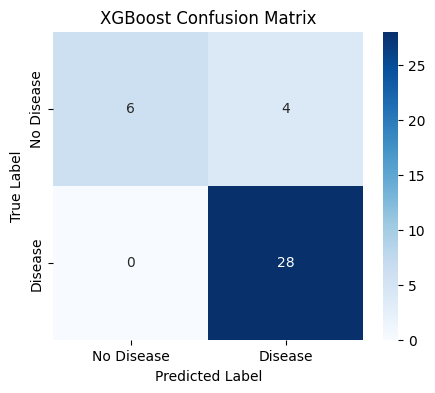


SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.90      1.00      0.95        28

    accuracy                           0.92        38
   macro avg       0.95      0.85      0.89        38
weighted avg       0.93      0.92      0.92        38


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.96      0.95        28

    accuracy                           0.92        38
   macro avg       0.91      0.88      0.89        38
weighted avg       0.92      0.92      0.92        38


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.88      1.00      0.93        28

    accuracy                           0.89        38
   macro avg       0.94    

In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.under_sampling import TomekLinks  

# Load the Parkinson's dataset
parkinsons_dataset = pd.read_csv('../datasets/parkinsons.csv')

# Splitting features and target
X = parkinsons_dataset.drop(columns=['status','name'])  # Features
Y = parkinsons_dataset['status']  # Target variable (0 or 1)

# 1. Handle Class Imbalance using Tomek Links (Removes Majority Samples Close to Minority)
tomek = TomekLinks()
X_resampled, Y_resampled = tomek.fit_resample(X, Y)

# 2. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# 3. Stratified Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_resampled, test_size=0.2, random_state=42, stratify=Y_resampled)

# 4. Hyperparameter Tuning with GridSearchCV (Stratified K-Fold Cross-Validation)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

### 4.1 SVM with GridSearchCV
svm_model = SVC()
svm_param_grid = {'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']}
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=skf, scoring='accuracy')
svm_grid_search.fit(X_train, Y_train)
svm_best_model = svm_grid_search.best_estimator_
svm_y_pred = svm_best_model.predict(X_test)

### 4.2 Random Forest with GridSearchCV (Fixed Overfitting)
rf_model = RandomForestClassifier(random_state=42)
### 🔹 Random Forest with Improved Generalization
### 🔹 Random Forest - Further Overfitting Reduction
rf_param_grid = {
    'n_estimators': [50],  
    'max_depth': [3, 5],         
    'min_samples_split': [15, 25],  
    'min_samples_leaf': [5, 10]     
}
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=skf, scoring='accuracy')
rf_grid_search.fit(X_train, Y_train)
rf_best_model = rf_grid_search.best_estimator_
rf_y_pred = rf_best_model.predict(X_test)

### 🔹 XGBoost - Further Overfitting Reduction
xgb_param_grid = {
    'n_estimators': [100],     
    'max_depth': [3],          
    'reg_alpha': [1, 2],     
    'reg_lambda': [5, 10],     
    'learning_rate': [0.005, 0.01] 
}
xgb_grid_search = GridSearchCV(XGBClassifier(random_state=42), xgb_param_grid, cv=skf, scoring='accuracy')
xgb_grid_search.fit(X_train, Y_train)
xgb_best_model = xgb_grid_search.best_estimator_
xgb_y_pred = xgb_best_model.predict(X_test)



# 5. Evaluate Models
print("SVM Best Model Accuracy:", accuracy_score(Y_test, svm_y_pred))
print("Random Forest Best Model Accuracy:", accuracy_score(Y_test, rf_y_pred))
print("XGBoost Best Model Accuracy:", accuracy_score(Y_test, xgb_y_pred))

# 6. Training Accuracy Check (To Identify Overfitting)
print("\nTraining Accuracy (SVM):", accuracy_score(Y_train, svm_best_model.predict(X_train)))
print("Training Accuracy (RF):", accuracy_score(Y_train, rf_best_model.predict(X_train)))
print("Training Accuracy (XGBoost):", accuracy_score(Y_train, xgb_best_model.predict(X_train)))

# 7. Confusion Matrix Function
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

# 8. Plot Confusion Matrices
plot_confusion_matrix(Y_test, svm_y_pred, "SVM Confusion Matrix")
plot_confusion_matrix(Y_test, rf_y_pred, "Random Forest Confusion Matrix")
plot_confusion_matrix(Y_test, xgb_y_pred, "XGBoost Confusion Matrix")

# 9. Detailed Classification Report
print("\nSVM Classification Report:\n", classification_report(Y_test, svm_y_pred))
print("\nRandom Forest Classification Report:\n", classification_report(Y_test, rf_y_pred))
print("\nXGBoost Classification Report:\n", classification_report(Y_test, xgb_y_pred))


In [20]:
import pickle

In [21]:
filename='parkinsons_model.sav'
pickle.dump(svm_best_model,open(filename,'wb'))